# UTS Penambangan Data 

Lakukan analisa terhadap data pada  https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra  dengan menggunakan klasifikasi

- metode KNN

- metode pohon keputusan (Desision tree)

Proses analisa dilaporkan dan diupload di github ( menggunakan jupyter book)

# Metode KNN

**KNN (K-Nearest Neighbor)** adalah algoritma klasifikasi terawasi sederhana yang dapat kita gunakan untuk menetapkan kelas ke titik data baru.

In [37]:
from sklearn.model_selection import train_test_split #split dataset into train and test data
from sklearn.neighbors import KNeighborsClassifier# Create KNN classifier
import pandas as pd

In [38]:

## read in the data using pandas 
url = "https://raw.githubusercontent.com/saiyidativiennaarumpratama/datamining/main/dataR2.csv"
df = pd.read_csv(url)
#check data has been read in properly
df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


Statistik Deskriptif Data

In [39]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


df.shape untuk memeriksa jumlah baris dan kolom pada dataset

In [40]:
df.shape

(116, 10)

Preprocessing
Memisahkan Features dan Label

### Hitung Data


```
# data latih (nilai data)
X_train 

# data tes (nilai data)
X_test 

# data latih (kelas data)
y_train

# data tes (kelas data)
y_test
```





In [41]:
# membuat data dengan semua data kecuali target kolom
X = df.drop(columns=["Classification"])#mengecek variabel target apakah sudah dihapus atau belum
X.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920


In [42]:
#separate target values
y = df["Classification"].values
#view target values
y[0:5]

array([1, 1, 1, 1, 1])

Membagi Data Latih dan Uji 
dengan menggunakan fungsi **train_test_split** untuk memudahkan proses pembagian data agar data yang dibagi seimbang

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = percent_amount_of_test_data, random_state=1, stratify=y)

In [44]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5]

array([[ 0.1378814 ,  0.61671743,  1.51327539,  1.90008333,  1.99763841,
         0.53154257, -0.19112396, -0.28617976, -0.50253798],
       [ 1.69242665, -0.32869056, -0.10235682, -0.58883138, -0.49512501,
        -1.02777254, -0.26760049, -0.45208086, -0.97922626],
       [ 0.51097226,  0.61818307, -0.74860971, -0.61607874, -0.5557035 ,
        -0.59237774, -0.86044525, -1.0080085 ,  0.19086669],
       [-1.35448204,  0.07480755, -0.56396603, -0.60017637, -0.53386379,
        -0.64956077, -0.15948536, -0.49249757, -0.10086892],
       [-0.17302765,  0.76850924, -0.28700051,  0.59153167,  0.28562128,
         0.49933   ,  0.23176344, -0.66738691, -0.24864912]])

In [45]:
# Membangun KNN Classifier
KNN = KNeighborsClassifier(n_neighbors = 5,metric = 'minkowski', p = 2)
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [46]:
# Memeriksa keakuratan model pada data uji
KNN.score(X_test, y_test)

0.7083333333333334

In [47]:
# Hasil Akurasi
from sklearn.metrics import *
import numpy as np

#Check Accuracy precision, recall, f1-score
print( classification_report(y_test, KNN.predict(X_test)) )
#Another way to get the models accuracy on the test data
print(F'Accuracy:',accuracy_score(y_test, KNN.predict(X_test)))
print(F'Precision:', precision_score(y_test, KNN.predict(X_test)))
print(F'Recall:', recall_score(y_test, KNN.predict(X_test)))
print(F'F1 Score:', f1_score(y_test, KNN.predict(X_test)))

#Check Roc Auc Score
print( F'Roc Auc Score:',roc_auc_score(y_test, KNN.predict(X_test)) )

print( F'Balanced Accuracy Score:',balanced_accuracy_score(y_test, KNN.predict(X_test)) ) 
print( F'Confusion Matrix:',confusion_matrix(y_test, KNN.predict(X_test)) )
print()#Print a new line

              precision    recall  f1-score   support

           1       0.67      0.73      0.70        11
           2       0.75      0.69      0.72        13

    accuracy                           0.71        24
   macro avg       0.71      0.71      0.71        24
weighted avg       0.71      0.71      0.71        24

Accuracy: 0.7083333333333334
Precision: 0.6666666666666666
Recall: 0.7272727272727273
F1 Score: 0.6956521739130435
Roc Auc Score: 0.7097902097902098
Balanced Accuracy Score: 0.7097902097902098
Confusion Matrix: [[8 3]
 [4 9]]



# Metode Pohon Keputusan (Decision Tree)

---



**Decision Tree** merupakan model analisis pemecahan masalah pengambilan keputusan, yang mana pemetaan mengenai alternatif-alternatif pemecahan masalah dapat diambil dari masalah tersebut. Pohon tersebut juga memperlihatkan faktor-faktor kemungkinan atau probablitas yang akan mempengaruhi alternatif keputusan disertai dengan estimasi hasil akhir yang akan didapat apabila mengambil alternatif keputusan tersebut.  

**Jenis pohon keputusan** berdasarkan variabel sasaran, yaitu pohon keputusan variabel kategorikal dan pohon keputusan variabel kontinu.

Pohon keputusan variabel kategori merupakan sebuah pohon keputusan variabel kategoris termasuk variabel target kategoris dibagi ke dalam kategori.

Pohon keputusan variabel kontinu Pohon keputusan variabel kontinu adalah pohon keputusan dengan variabel target kontinu. 

**Rumus Gini Index** 

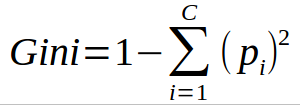

In [48]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

In [50]:
url = "https://raw.githubusercontent.com/saiyidativiennaarumpratama/datamining/main/dataR2.csv"
data = pd.read_csv(url)
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [51]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

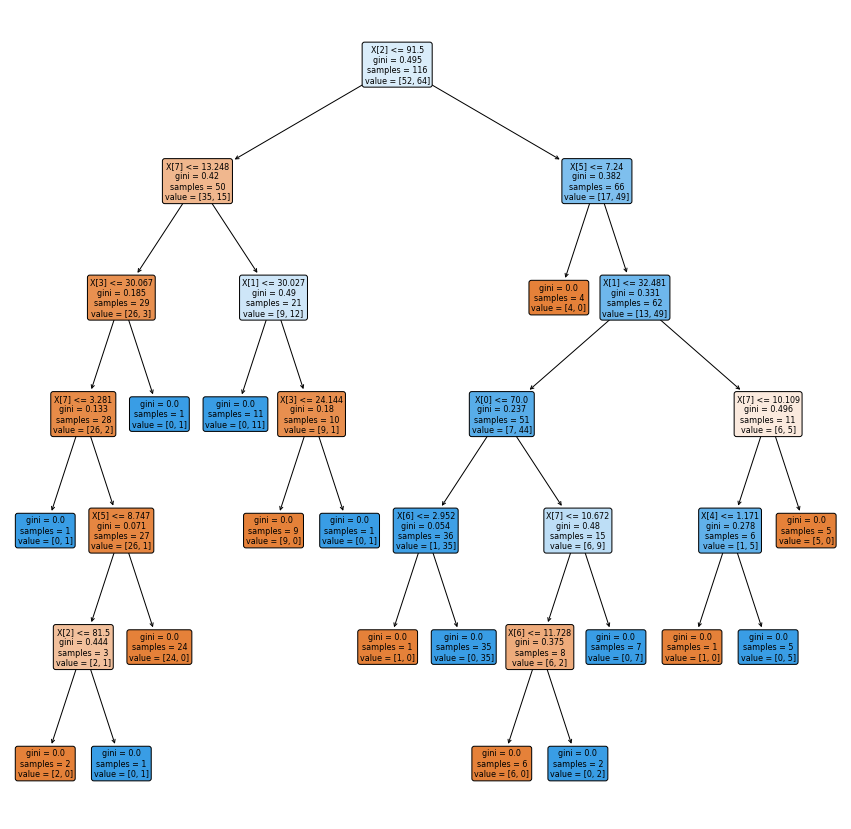

In [52]:
#plt the figure, setting a black background
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()